# 코로나 19 뉴스 워드클라우드 시각화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
df =pd.read_csv('/Users/eastone/Desktop/UCA/progrmming_in_python/data/한국언론진흥재단_뉴스빅데이터_메타데이터_코로나_20200831.csv',encoding='CP949')


/Users/eastone/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,주소,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,개체명(인물),개체명(지역),개체명(기업/기관),키워드,특성추출,본문,원본주소,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,http://www.bigkinds.or.kr/news/newsDetailView....,20200801.0,경기일보,임진흥 기자,"의왕시, 청소년 랜선 트롯 가요제 개최",문화>전시_공연,NaN,NaN,NaN,NaN,NaN,NaN,의왕시 의왕학생축제,진로 의왕학생동아리연합회 의왕시장 의왕시,"의왕시,청소년,랜선,트롯,가요,개최,의왕시,코로나,장기,진로체험,문화,활동,청소년들...","의왕시,온라인,실시간,의왕,가요제,엔터테이너,dream,오프라인,김상돈,유튜브,트롯...",의왕시는 코로나 19 장기화로 진로체험 및 문화 활동이 어려운 청소년들을 위해 진로...,www.kyeonggi.com/news/articleView.html?idxno=2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://www.bigkinds.or.kr/news/newsDetailView....,20200801.0,경기일보,이광희 기자,'이재명이 조폭?' 악의적 허위사실 유포 90건 경찰 '고발',사회>미디어,지역>경기,지역>충남,NaN,NaN,NaN,백 백종덕 최정민 이재명,경기도지사 왜곡,서성민 변호사 가짜뉴스 일베 광주경찰서 분당경찰서,"이재명이,조폭,악의,허위,사실,유포,경찰,고발,대책단,코로나19,가짜,백종덕,최정민...","이재명,가짜뉴스,악의적,공동단장,백종덕,허위사실,코로나19,90건,온라인,살해설,조...",코로나19 가짜뉴스 대책단(백종덕ㆍ최정민ㆍ서성민 변호사 공동단장)이 지난 29일 이...,www.kyeonggi.com/news/articleView.html?idxno=2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://www.bigkinds.or.kr/news/newsDetailView....,20200801.0,한국경제,한경닷컴,"모츠(MOTZ), 비대면 라이브 이벤트 솔루션 출시",IT_과학>콘텐츠,IT_과학>인터넷_SNS,IT_과학>모바일,NaN,NaN,NaN,NaN,페기구 한국형 뉴딜정책 내한공연 한국 동계 평창,정부 세미나 프라이빗 한경닷컴 ㈜캐롯닷밀 비대면 캐롯닷밀 한국 페스티벌,"모츠,MOTZ,출시,라이브,이벤트,솔루션,언택트,시대,마케팅,업계,변화,바람,오프라...","오프라인,모츠,한국,온라인,런칭,전문가,언택트,캐롯닷밀,뉴딜,엘튼,조슈아","지금까지와는 전혀 다른 언택트 시대가 다가오면서, 마케팅 업계에도 변화의 바람이 불...",https://www.hankyung.com/economy/article/20200...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://www.bigkinds.or.kr/news/newsDetailView....,20200801.0,YTN,양시창,소리 못 질러도 괜찮아...'직관' 갈증 해소한 축구팬들,스포츠>축구,스포츠>농구_배구,스포츠>월드컵,NaN,NaN,NaN,최용수,경기 광주도 성남 성남시 전북 전북도 포항,서울,"소리,직관,갈증,해소,축구팬들,앵커,프로야구,프로축구,코로나,사태,관중,입장,허용,...","팬들,경기장,광주도,선수들,역전승,최용수,전북도,양시창,전후좌우,2칸,엄원,모라이스...",[앵커] ..프로야구에 이어 프로축구도 코로나 19 사태 뒤 처음으로 관중 입장이 ...,https://www.ytn.co.kr/_ln/0107_202008012223393076,NaN,NaN,NaN,NaN,NaN,NaN,날짜별 기사 수,NaN,NaN,NaN,NaN,NaN
4,http://www.bigkinds.or.kr/news/newsDetailView....,20200801.0,YTN,박철원,"미, 코로나19 백신 대량 입도선매...EU·日도 백신 확보전 동참",국제>미국_북미,IT_과학>IT_과학일반,NaN,사회>사회갈등>시위,NaN,NaN,앤서니 파우치,미 미국 유럽 일본 프랑스,EU 미국 유럽연합 정부 제약사 집행위원회 행정부,"코로나19,백신,대량,입도선매,EU·,동참,백신,확보전,앵커,세계적,재확산,코로나1...","미국,코로나19,제약사,사노피,유럽연합,행정부,유럽,상용화,5억,입도선매,사람들,임...",[앵커] ..전세계적으로 재확산 중인 코로나19가 진정될 조짐을 안 보이는 가운데 ...,https://www.ytn.co.kr/_ln/0104_202008010720568851,NaN,NaN,NaN,NaN,NaN,NaN,20200831,5444.0,NaN,NaN,NaN,NaN


In [56]:
df['키워드'][0]

'의왕시,청소년,랜선,트롯,가요,개최,의왕시,코로나,장기,진로체험,문화,활동,청소년들,진로,멘토링,학생축제,온라인,진행,31일,의왕시,Dream,Air,이름,전국,진행,멘토링,실시간,온라인,청소년들,호응,시즌,마련,의왕학생동아리연합회,의견,반영,홍진영,만능,엔터테이너,멘토,출연,3회,의왕학생축제,Uiwang,Youth,Festival,방식,오프라인,축제,경연,무관,온라인,청소년,랜선,트롯,가요제,진행,예정,의왕시,홈페이지,게시,참가,신청서,작성,영상,예선,심사,이메일,8월,12일,제출,프로그램,화상,활용,예정,실시간,소통,100명,참가단,모집,Dream,Air,9월,2시,청소년,랜선,트롯,가요제,9월,6시,채널,유튜브,의왕시,라이브,방송,예정,김상돈,의왕,시장,사회,거리,외부,활동,제한,청소년,방법,사업,추진,진로,궁금증,해소,힐링'

키워드 별로 본문 속 단어들이 추출되어 있는 모습. 따라서 따로 형태소분석은 진행하지 않도록 한다.

In [ ]:
word_list = df['키워드'].tolist()
word_list_sum = []
for i in range(len(word_list)):
    word_list_sum = word_list_sum + word_list[i].split(',')


쉼표로 나눠져 있는 각 행들을 리스트로 변환한 다음 하나의 리스트로 합쳐준다.

In [36]:
from collections import Counter
count = Counter(word_list_sum)
count

Counter({'의왕시': 86,
         '청소년': 1173,
         '랜선': 162,
         '트롯': 165,
         '가요': 79,
         '개최': 2984,
         '코로나': 10083,
         '장기': 1795,
         '진로체험': 11,
         '문화': 3396,
         '활동': 4570,
         '청소년들': 316,
         '진로': 557,
         '멘토링': 191,
         '학생축제': 1,
         '온라인': 7018,
         '진행': 10005,
         '31일': 621,
         'Dream': 12,
         'Air': 31,
         '이름': 869,
         '전국': 3568,
         '실시간': 876,
         '호응': 381,
         '시즌': 1306,
         '마련': 3968,
         '의왕학생동아리연합회': 1,
         '의견': 1547,
         '반영': 1490,
         '홍진영': 52,
         '만능': 20,
         '엔터테이너': 2,
         '멘토': 99,
         '출연': 650,
         '3회': 114,
         '의왕학생축제': 1,
         'Uiwang': 1,
         'Youth': 6,
         'Festival': 8,
         '방식': 2804,
         '오프라인': 1099,
         '축제': 1588,
         '경연': 163,
         '무관': 125,
         '가요제': 16,
         '예정': 6569,
         '홈페이지': 1718,
         '게시

리스트 내에 있는 단어들의 빈도 수를 count하는 Counter함수 사용

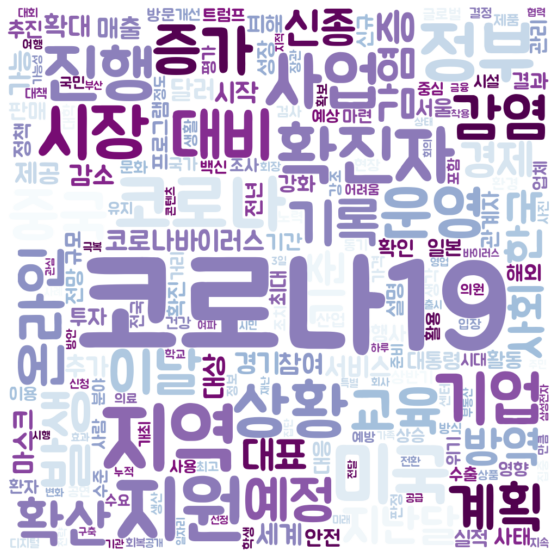

In [55]:
from wordcloud import WordCloud
fontpath = '/Users/eastone/Library/Fonts/BMJUA_ttf.ttf'
cloud = WordCloud(font_path = fontpath,width=1000,height=1000,
                 background_color = 'white',
                 colormap='BuPu').generate_from_frequencies(count)
plt.figure(figsize=(12,10))
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.show()